In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=sns.load_dataset("iris")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
for i in df: 
   print(df[i].value_counts())
   print("*"*50)

sepal_length
5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: count, dtype: int64
**************************************************
sepal_width
3.0    26
2.8    14
3.2    13
3.4    12
3.1    11
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.6     4
3.7     3
2.4     3
2.2     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: count, dtype: int64
**************************************************
petal_length
1.4    13
1.5    13
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     

In [7]:
obj_col= df.select_dtypes(object)
obj_col

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [8]:
num_col = df.select_dtypes(exclude=object)
num_col

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


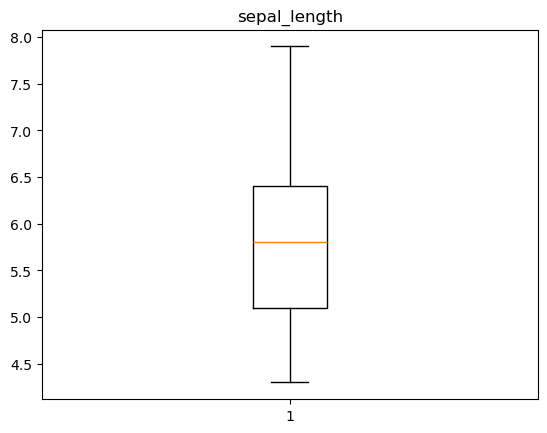

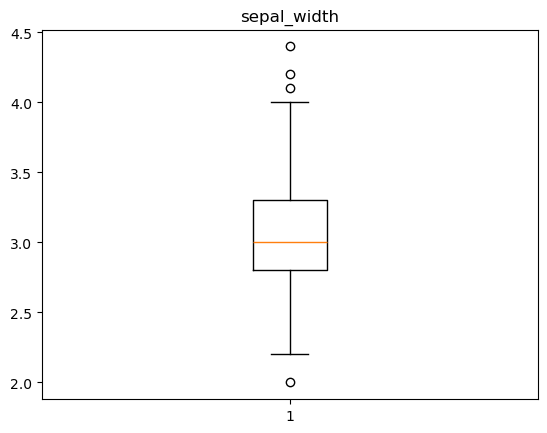

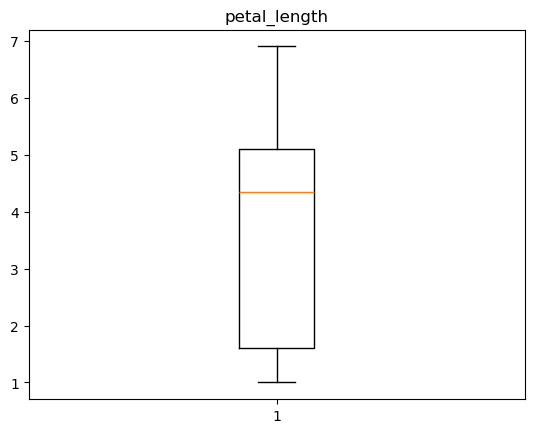

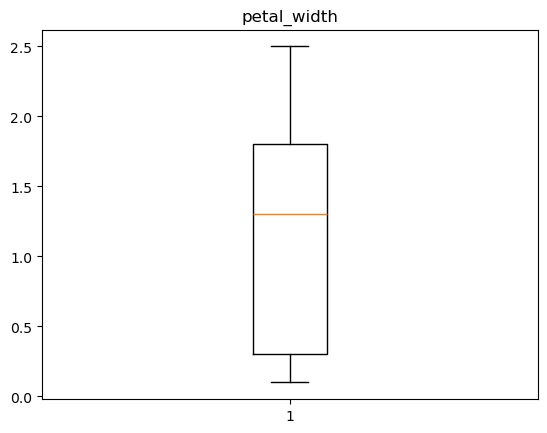

In [9]:
for i in num_col:
    plt.boxplot(x=num_col[i])
    plt.title(i)
    plt.show()

In [10]:
q1=df['sepal_width'].quantile(0.25)
q3=df['sepal_width'].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1", q1)
print("q3", q3)

print("iqr", iqr)
print("upper bound", ub)
print("lower bound", lb)

q1 2.8
q3 3.3
iqr 0.5
upper bound 4.05
lower bound 2.05


In [11]:
df.loc[df['sepal_width']>ub]

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [12]:
df.loc[df['sepal_width']>ub, 'sepal_width']=ub

In [13]:
df.loc[df['sepal_width']>ub]

,sepal_length,sepal_width,petal_length,petal_width,species


In [14]:
df.loc[df['sepal_width']<lb]

,sepal_length,sepal_width,petal_length,petal_width,species
60,5.0,2.0,3.5,1.0,versicolor


In [15]:
df.drop(60, inplace=True)

In [16]:
df.loc[df['sepal_width']<lb]

,sepal_length,sepal_width,petal_length,petal_width,species


In [17]:
from sklearn.preprocessing import LabelEncoder
p=LabelEncoder()

In [18]:
obj_col['species']=p.fit_transform(obj_col['species'])

In [19]:
obj_col

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [20]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [21]:
from sklearn.preprocessing import MinMaxScaler
q=MinMaxScaler()


In [22]:
w=num_col.columns
w

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [23]:
for i in w:
    num_col[i]=q.fit_transform(num_col[[i]])

In [24]:
num_col

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [25]:
#from scipy.stats import skew

In [26]:
new_df=pd.concat([num_col, obj_col], axis=1)
new_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


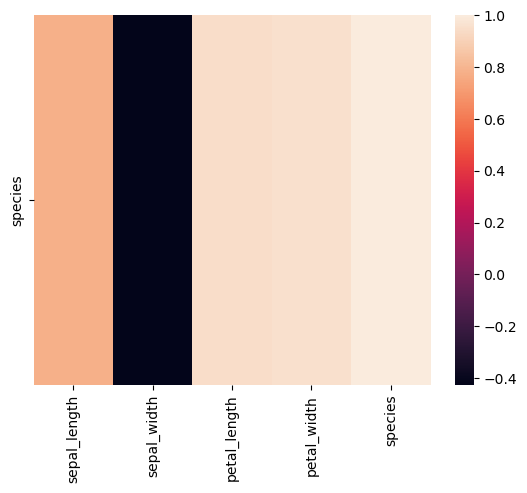

In [27]:
sns.heatmap(new_df.corr().tail(1))
plt.show()

In [28]:
from sklearn.svm import LinearSVC

In [29]:
l=LinearSVC(C=0.6)

In [30]:
x=new_df.drop(["species"],axis=1)

In [31]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [32]:
y=new_df["species"]

In [33]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2)

In [36]:
lsvc=l.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [37]:
y_pred=lsvc.predict(x_test)

In [38]:
from sklearn.metrics import classification_report

In [39]:
report=classification_report(y_pred,y_test)

In [40]:
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.73      0.89      0.80         9
           2       1.00      0.79      0.88        14

    accuracy                           0.89        38
   macro avg       0.89      0.89      0.88        38
weighted avg       0.91      0.89      0.90        38



In [41]:
from sklearn.svm import SVC

In [42]:
s=SVC(kernel="poly",degree=4,C=0.8)

In [43]:
model_svc=s.fit(x_train,y_train)

In [44]:
y_pred=model_svc.predict(x_test)

In [45]:
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [46]:
y_pred=model_svc.predict(x_train)

In [47]:
report_train=classification_report(y_pred,y_train)
print(report_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.97      1.00      0.99        38
           2       1.00      0.97      0.99        40

    accuracy                           0.99       112
   macro avg       0.99      0.99      0.99       112
weighted avg       0.99      0.99      0.99       112

